
1.1) Importing Libraries  
“Importing all necessary libraries that will be used throughout the Deep Learning pipeline, including data loading, preprocessing, model building, training, and evaluation.”

In [1]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')
# Handle table-like data and matrices :
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Modelling Helpers :
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# Deep Learning Libraries
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, Flatten

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

Check Data NaN

In [5]:
np.isnan(train_images).any()

np.False_

Visulaizing the Data

In [6]:
x_data = train_images.copy()
y_data = train_labels
x_data = np.array(x_data).reshape(-1, 28, 28) / 255.0

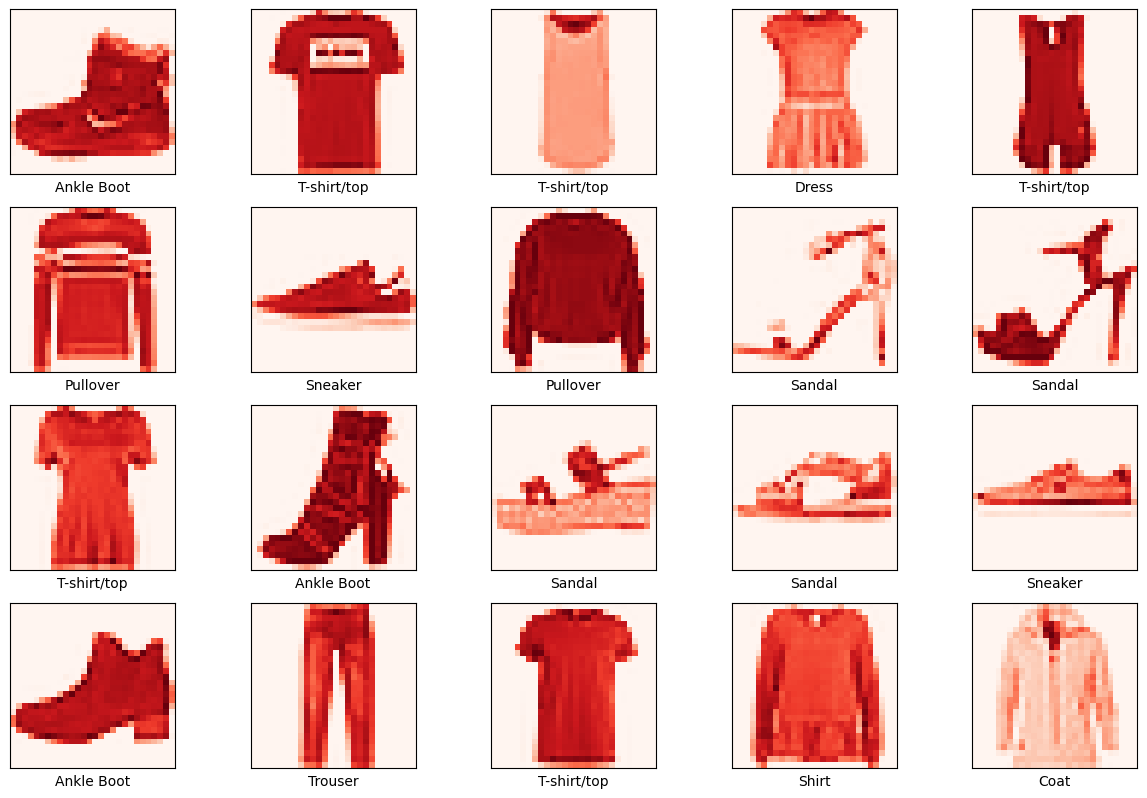

In [7]:
labeldict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

plt.figure(figsize=(15, 15))
for i in range(20):
  plt.subplot(6,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_data[i], cmap='Reds')
  plt.xlabel(labeldict[y_data[i]])
plt.show()

Data Normalization

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Reshaping the Data

In [9]:
train_images.shape

(60000, 28, 28)

One Hot Encoding

In [10]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [11]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=10)

In [12]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (60000, 28, 28, 1)
Testing images shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Testing labels shape: (10000, 10)


**Training a Convolutional Neural Network (CNN) model.”**

Steps:

First, we use the Keras Sequential API, which is simply a linear stack of layers. We add one layer at a time starting from the input.

Next, we add Convolutional Layers, which are the building blocks of ConvNets. Convolutional layers contain a set of independent filters whose depth matches the input, while the other dimensions can be manually set. When these filters convolve over the input image, they produce feature maps.

Then, we add Pooling Layers, which are used for dimensionality reduction or downsampling. These layers are useful when there are many input features, as they drastically reduce the number of parameters and the computational power required, which helps reduce overfitting. Together with convolutional layers, they help the network learn more complex image features.

We add Batch Normalization, which normalizes the inputs to have zero mean and unit variance. This reduces outliers, forces the network to learn features in a more distributed way, reduces dependence on specific weights, and improves overall model performance.

To avoid overfitting, we add Dropout. Dropout randomly drops a percentage of neurons, causing the weights to readjust. The remaining neurons learn more robust features, reducing dependence on any single neuron. Dropout is a regularization technique that penalizes parameters. Typically, the dropout rate is set between 0.2 and 0.5.

Next, we add a Flatten layer to map the input into a 1D vector. After several convolutional/pooling layers, we then add fully connected (dense) layers. These layers combine all the features learned in the previous layers.

Finally, we add the Output Layer.

It has the same number of units as the number of classes to be identified.

We use the sigmoid activation function for binary classification.

For multi-class classification, we use the softmax activation function.

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides= 2))
model.add(Dropout(rate=0.2))
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

Model Summary


The summary of the model contains the layers, output shapes, and parameters.

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,342,346 (12.75 MB)

 Trainable params: 3,342,346 (12.75 MB)

 Non-trainable params: 0 (0.00 B)

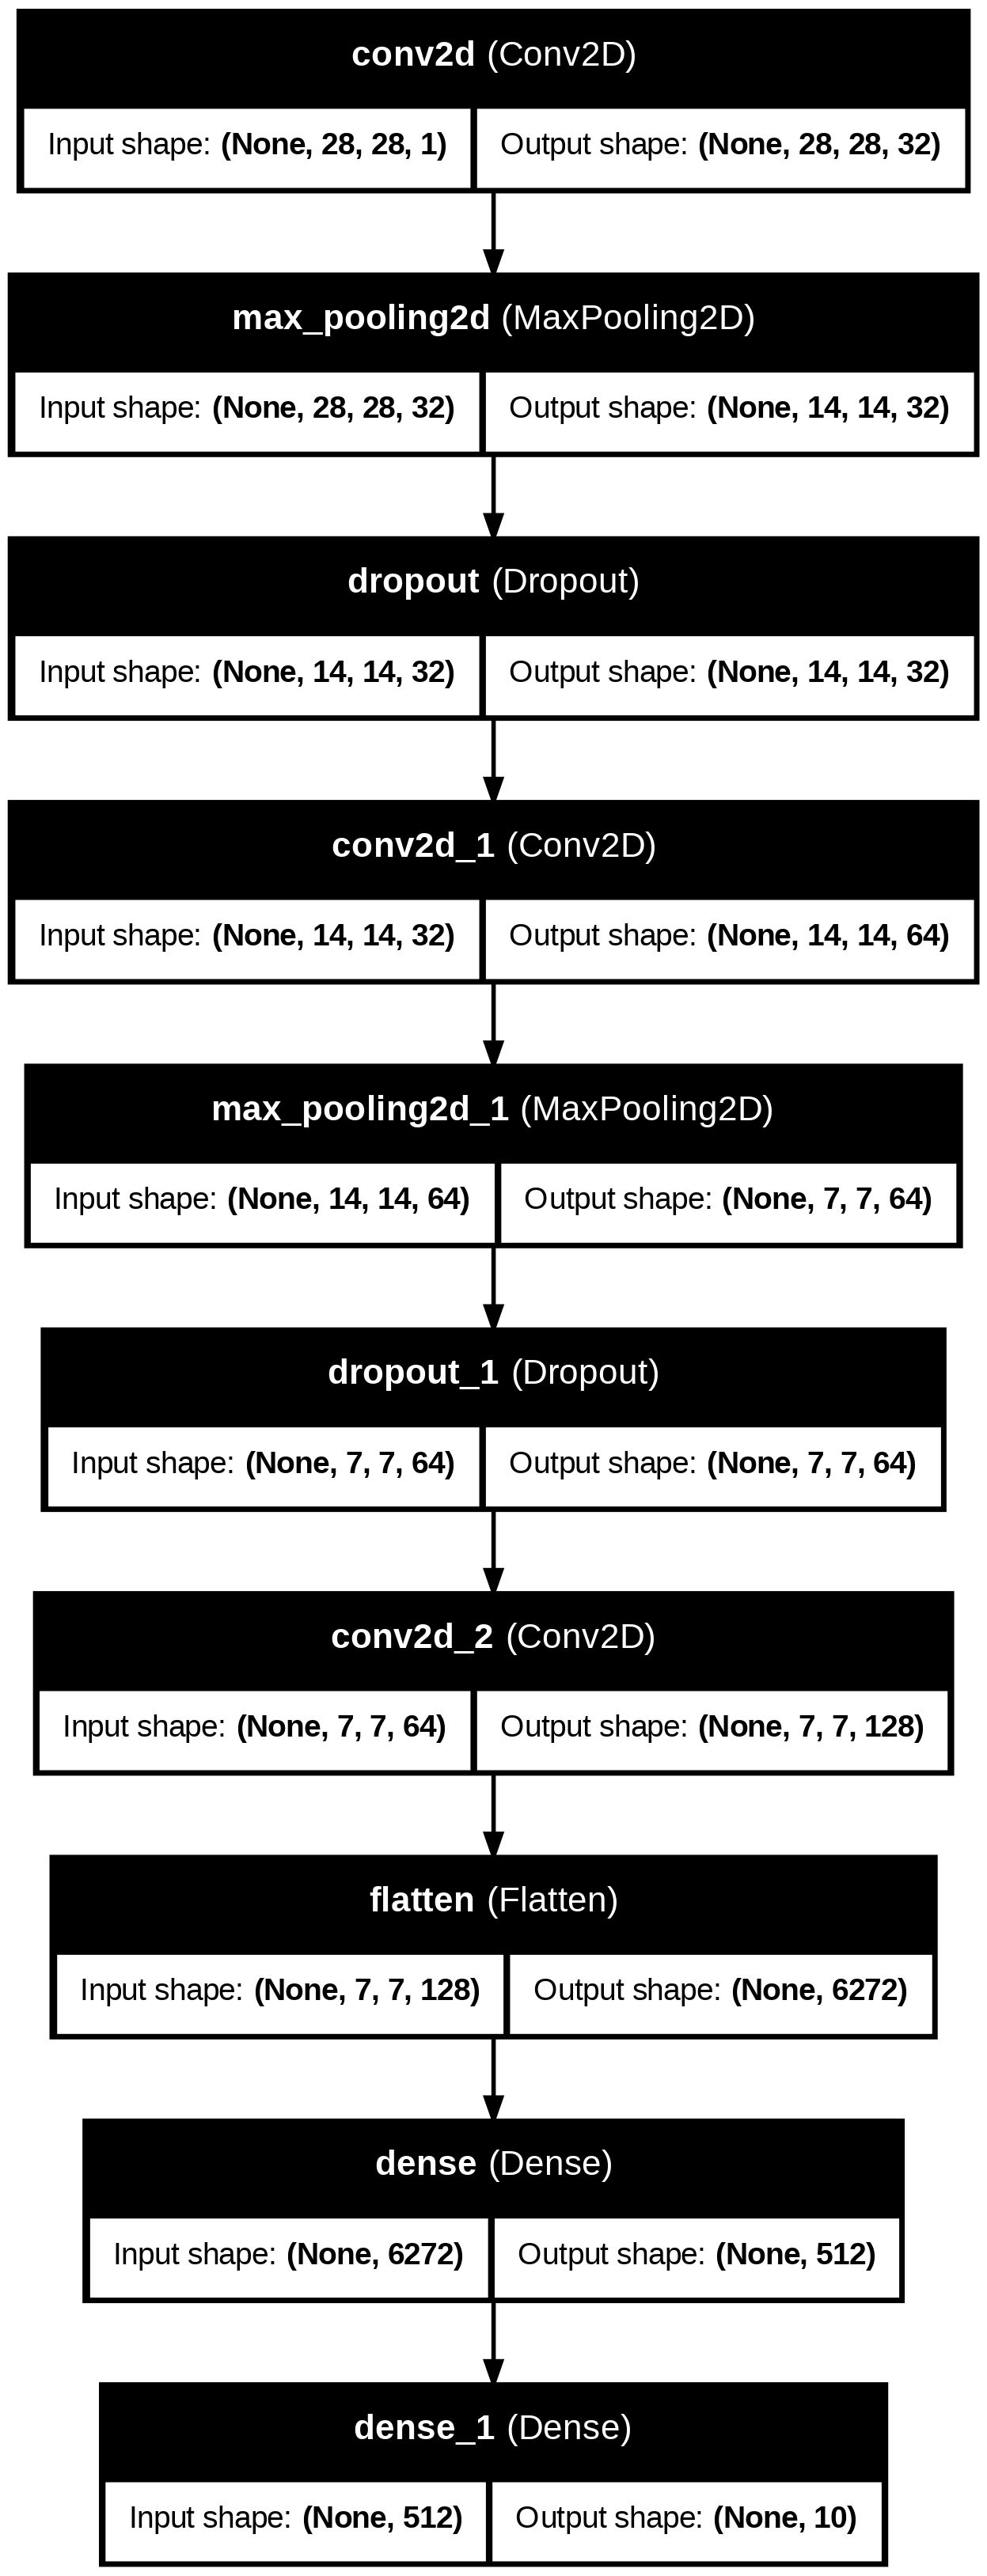

In [15]:

import tensorflow as tf
from keras.utils import plot_model

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Compiling the Model

We need to compile the model by specifying the optimizer required for training. There are several choices available, such as Adam, RMSprop, and others.

Next, we must define the loss function for the neural network, which we aim to minimize. For binary classification, we use "binary_crossentropy", and for multi-class classification, we use "categorical_crossentropy".

Finally, we specify the metrics that will be used to evaluate the performance of the model.

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Data Augmentation

Image data augmentation is used to manipulate the data by rotating images, enlarging them, cropping them, or flipping them—without removing the essential information contained in the data.

In [17]:
# Data Augmentation
datagen = ImageDataGenerator(
        rotation_range = 8,       # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2,         # Randomly zoom image
        shear_range = 0.3,        # shear angle in counter-clockwise direction in degrees
        width_shift_range = 0.08,   # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip = True)       # randomly flip images


In [18]:
datagen.fit(train_images)

Fitting the Model

Training the model using the selected batch size and number of epochs.

In [19]:
BATCH_SIZE = 512
EPOCHS = 50


In [20]:
# Fit the Model data
history = model.fit(datagen.flow(train_images, train_labels_one_hot, batch_size = BATCH_SIZE),
                              epochs = EPOCHS,
                              validation_data = (test_images,test_labels_one_hot),
                              verbose=2,
                              steps_per_epoch = train_images.shape[0] // BATCH_SIZE)


Epoch 1/50
117/117 - 197s - 2s/step - accuracy: 0.6479 - loss: 0.9256 - val_accuracy: 0.7889 - val_loss: 0.5586
Epoch 2/50
117/117 - 12s - 101ms/step - accuracy: 0.7383 - loss: 0.7212 - val_accuracy: 0.7858 - val_loss: 0.5560
Epoch 3/50
117/117 - 244s - 2s/step - accuracy: 0.7660 - loss: 0.6145 - val_accuracy: 0.8277 - val_loss: 0.4788
Epoch 4/50
117/117 - 10s - 82ms/step - accuracy: 0.7793 - loss: 0.5662 - val_accuracy: 0.8199 - val_loss: 0.4863
Epoch 5/50
117/117 - 185s - 2s/step - accuracy: 0.7910 - loss: 0.5479 - val_accuracy: 0.8403 - val_loss: 0.4437
Epoch 6/50
117/117 - 10s - 84ms/step - accuracy: 0.7969 - loss: 0.5265 - val_accuracy: 0.8472 - val_loss: 0.4328
Epoch 7/50
117/117 - 193s - 2s/step - accuracy: 0.8131 - loss: 0.4962 - val_accuracy: 0.8625 - val_loss: 0.3852
Epoch 8/50
117/117 - 12s - 99ms/step - accuracy: 0.8223 - loss: 0.4608 - val_accuracy: 0.8542 - val_loss: 0.3984
Epoch 9/50
117/117 - 184s - 2s/step - accuracy: 0.8255 - loss: 0.4596 - val_accuracy: 0.8647 - val_

Evaluting the model

In [21]:
# Evaluate the model
score = model.evaluate(test_images, test_labels_one_hot, verbose=0)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))


Loss: 0.2526
Accuracy: 0.9095


Plotting the Training and Validation Curves

Displaying the training and validation data plots generated from the method used.

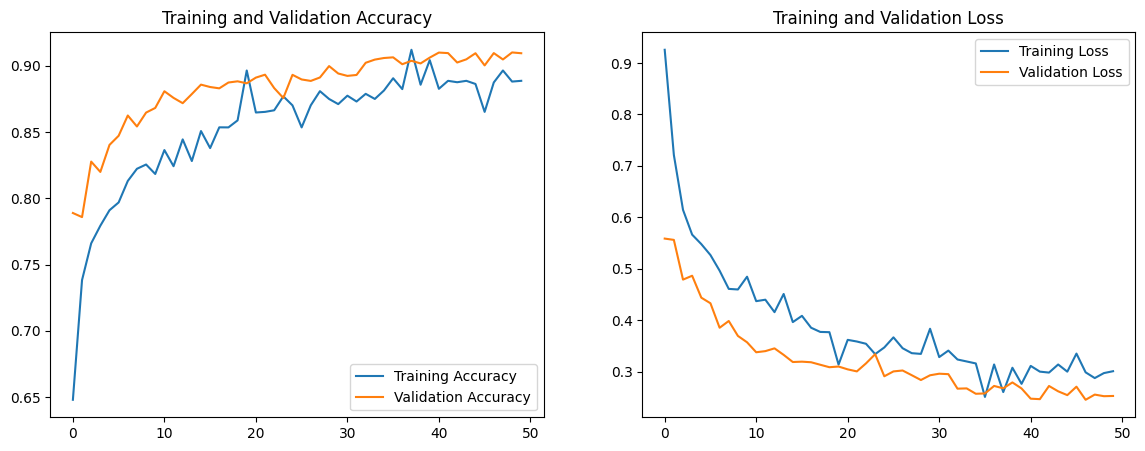

In [22]:
# Extract accuracy and loss from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Range of epochs
epochs_range = range(EPOCHS)

# Plot training vs validation accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


Confusion Matrix

A Confusion Matrix is used to evaluate the model’s performance by comparing the predicted results with the actual data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


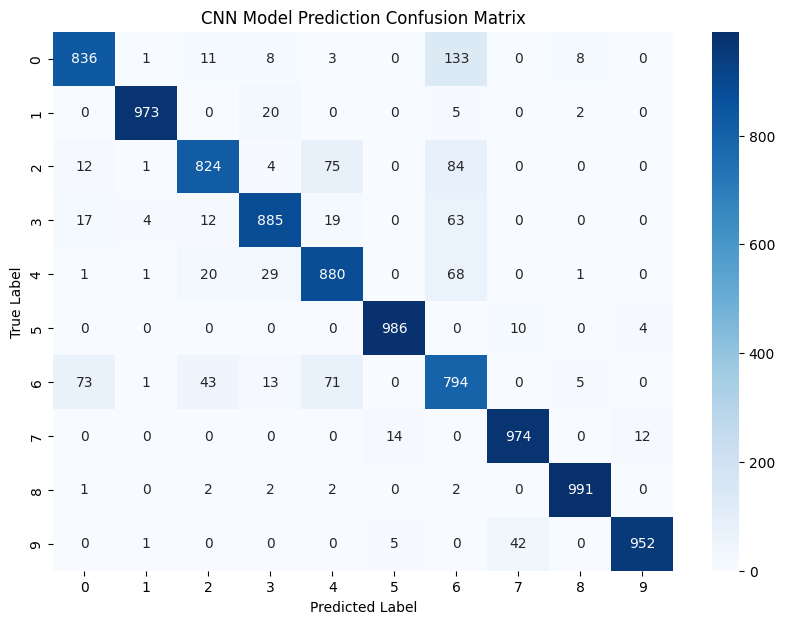

In [23]:
# Get Model Predictions for test data
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

# Model prediction
predicted_probs = model.predict(test_images)
Y_pred_classes = np.argmax(predicted_probs, axis=1)

# Convert true one-hot labels to class numbers
Y_true = np.argmax(test_labels_one_hot, axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CNN Model Prediction Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Correctly Predicted Classes

A visualization of correctly predicted data labels based on their respective classes.

In [24]:
correct = []
for i in range(len(test_labels_one_hot)):
  if(Y_pred_classes[i] == Y_true[i]):
    correct.append(i)
  if(len(correct) == 4):
    break

Text(0.5, 1.0, 'Predicted Label : Trouser\nActual Label : Trouser')

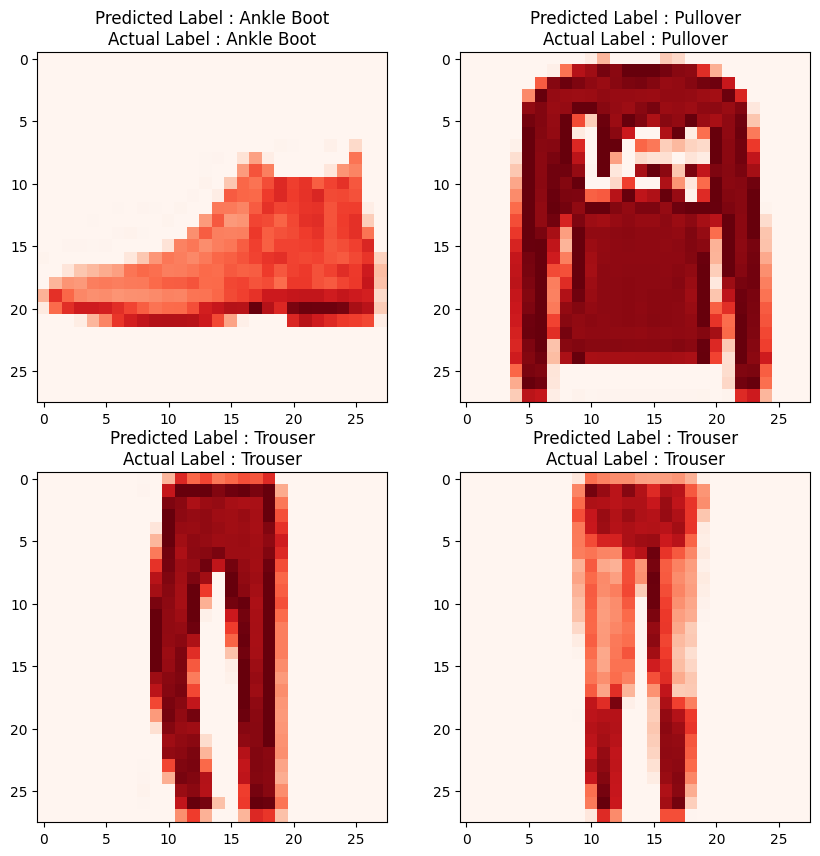

In [26]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)

ax[0,0].imshow(test_images[correct[0]].reshape(28,28), cmap='Reds')
ax[0,0].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[correct[0]]]) + "\n" +
                 "Actual Label : " + str(labeldict[Y_true[correct[0]]]))

ax[0,1].imshow(test_images[correct[1]].reshape(28,28), cmap='Reds')
ax[0,1].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[correct[1]]]) + "\n" +
                 "Actual Label : " + str(labeldict[Y_true[correct[1]]]))

ax[1,0].imshow(test_images[correct[2]].reshape(28,28), cmap='Reds')
ax[1,0].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[correct[2]]]) + "\n" +
                 "Actual Label : " + str(labeldict[Y_true[correct[2]]]))

ax[1,1].imshow(test_images[correct[3]].reshape(28,28), cmap='Reds')
ax[1,1].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[correct[3]]]) + "\n" +
                 "Actual Label : " + str(labeldict[Y_true[correct[3]]]))


Incorrectly Predicted Classes

A visualization of misclassified data, showing images where the predicted label does not match the actual class label.

In [27]:
incorrect = []
for i in range(len(test_labels_one_hot)):
  if(not Y_pred_classes[i] == Y_true[i]):
    incorrect.append(i)
  if(len(incorrect) == 4):
    break

Text(0.5, 1.0, 'Predicted Label : Sandal\nActual Label : Ankle Boot')

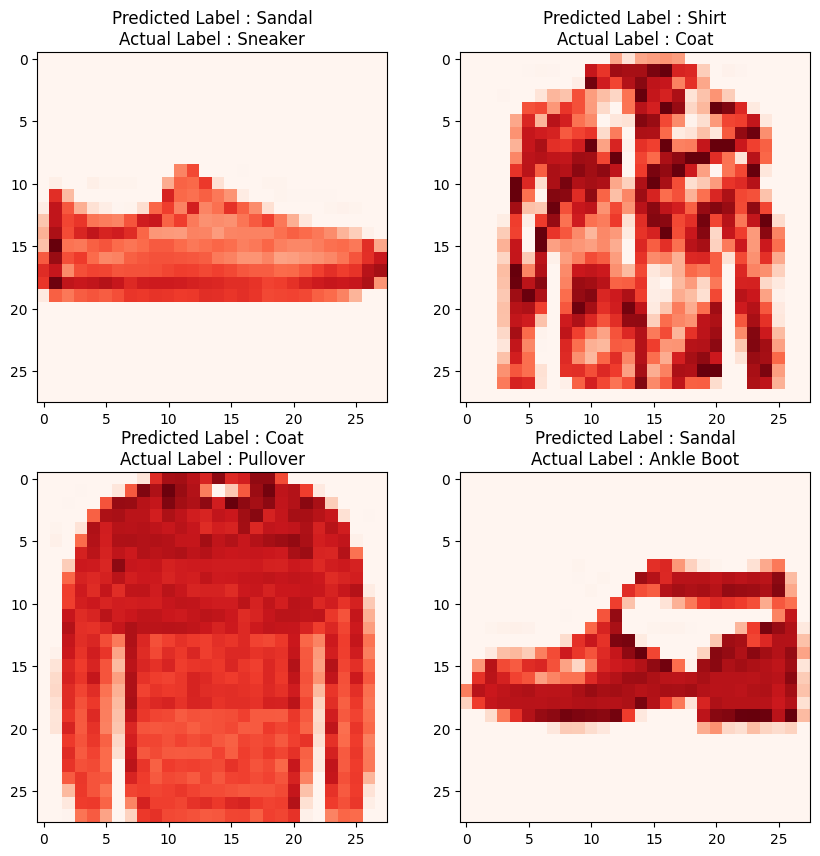

In [28]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)

ax[0,0].imshow(test_images[incorrect[0]].reshape(28,28), cmap='Reds')
ax[0,0].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[incorrect[0]]]) + "\n" +
                 "Actual Label : " + str(labeldict[Y_true[incorrect[0]]]))

ax[0,1].imshow(test_images[incorrect[1]].reshape(28,28), cmap='Reds')
ax[0,1].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[incorrect[1]]]) + "\n" +
                 "Actual Label : " + str(labeldict[Y_true[incorrect[1]]]))

ax[1,0].imshow(test_images[incorrect[2]].reshape(28,28), cmap='Reds')
ax[1,0].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[incorrect[2]]]) + "\n" +
                 "Actual Label : " + str(labeldict[Y_true[incorrect[2]]]))

ax[1,1].imshow(test_images[incorrect[3]].reshape(28,28), cmap='Reds')
ax[1,1].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[incorrect[3]]]) + "\n" +
                 "Actual Label : " + str(labeldict[Y_true[incorrect[3]]]))


Classification Report

A Classification Report is used to display Precision, Recall, F1-Score, and Support for each class.

In [29]:
print(classification_report(Y_true, Y_pred_classes, target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.89      0.84      0.86      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.90      0.82      0.86      1000
       Dress       0.92      0.89      0.90      1000
        Coat       0.84      0.88      0.86      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.69      0.79      0.74      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.99      0.99      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Look at the precision for the “Shirt” class. We can see that our model correctly predicts less than 79% of the Shirt images out of all images predicted as Shirts. We can conclude the same from the confusion matrix, where we see that many Shirt images are misclassified as T-shirts.